In [5]:
import sparse_causal_model_learner_rl.learner as learner
from sparse_causal_model_learner_rl.learner import Learner, learner_gin_sacred
import vectorincrement
import os
from matplotlib import pyplot as plt

In [6]:
ve_config_path = os.path.join(os.path.dirname(vectorincrement.__file__), 'config', 've5.gin')
learner_config_path = os.path.join(os.path.dirname(learner.__file__), 'configs', 'test.gin')
run = learner_gin_sacred([ve_config_path, learner_config_path])

INFO - ve5_test - Running command 'run_train'
INFO - ve5_test - Started run with ID "15"
 25%|██▌       | 5/20 [00:00<00:00, 45.58it/s]

Make environment VectorIncrement-v0 None {}
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_b799aadf-6a47-459b-9a97-475d02cc54e1.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_e2d36e37-dda7-47c0-adc9-fdd99958a007.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_443ef12e-7a33-4aa9-8a18-a7f52791f984.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_349b0558-03ca-4f74-9090-f83ce41b79a5.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_ede456b3-9698-403a-9702-e1d9018f66aa.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_61982cad-5ccd-42a6-9afe-016c08529635.pkl.
Failed t

100%|██████████| 20/20 [00:00<00:00, 65.81it/s]
INFO - ve5_test - Result: <Learner env=<ObservationScaleWrapper<TimeLimit<VectorIncrementEnvironment<VectorIncrement-v0>>>> feature_shape=(10,) epochs=20>
INFO - ve5_test - Completed after 0:00:00


Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_d51bfdd5-b240-4af8-8506-bc4b1cefcf5e.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_3c0494d6-a97a-46fa-9d9f-620015ea7f66.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_73514a0c-6544-4324-bb97-9cbf03ebcf1a.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_cac139b8-2fd7-42e5-b7a8-966c75d8580b.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_5c83d550-17d7-4762-98a0-6456894e23ab.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_e4b28619-7caf-4044-a4c0-b8c3317c6596.pkl.
Failed to detect content-type automatically for arti

In [7]:
learner = run.result
self = learner


In [8]:
from causal_util.helpers import lstdct2dctlst
import seaborn as sns
import numpy as np

In [26]:
def visualize(self, exclude=['epochs'], nolog=['metrics/nnz']):
    # plotting
    results = self.history
    results = lstdct2dctlst(results)
    
    for k in exclude:
        del results[k]
        
    for k in list(results.keys()):
        if len(set(results[k])) <= 1:
            del results[k]
    
    total_plots = len(results) + 2
    plot_xy = int(np.ceil((total_plots) ** 0.5))
    plot_x, plot_y = plot_xy, plot_xy
    
    
    fig = plt.figure(figsize=(plot_x * 4, plot_y * 5))
    fig.patch.set_facecolor('xkcd:mint green')
    for i, (k_, v) in enumerate(results.items()):
        plt.subplot(plot_x, plot_y, i + 1)
        plt.xlabel('epoch')
        plt.title(k_)
        plt.plot(v)
        if k_ not in nolog:
            plt.yscale('log')
        else:
            plt.axhline(0)

            
    Mf, bf, Ma = [x.detach().numpy() for x in self.model.parameters()]
    plt.subplot(plot_x, plot_y, len(results) + 1)
    plt.title("Model for features")
    sns.heatmap(Mf)
    
    plt.subplot(plot_x, plot_y, len(results) + 2)
    plt.title("Model for actions")
    sns.heatmap(Ma)

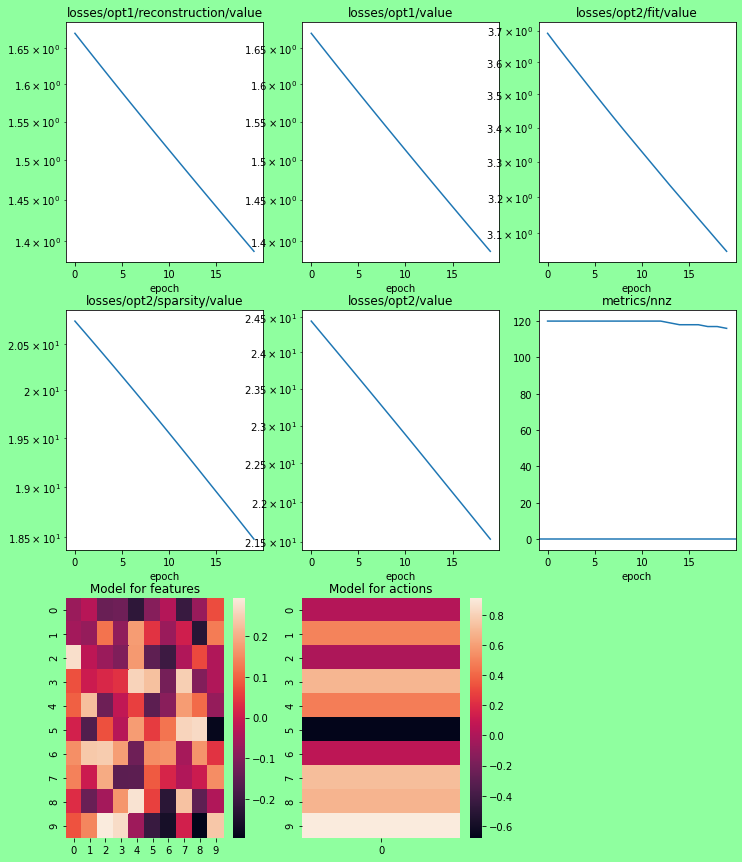

In [27]:
visualize(self)

In [22]:
Mf, bf, Ma = [x.detach().numpy() for x in self.model.parameters()]

In [23]:
Mf.shape, bf.shape, Ma.shape

((10, 10), (10,), (10, 1))

In [25]:
def graph_for_matrices(Mf, Ma, threshold=0.2):
    """Visualize matrices as a graph."""
    # dimension
    v_n = Ma.shape[0]

    ps = Digraph(name='Causal model', engine='neato')#,
                 #node_attr={'shape': 'plaintext'})

    # adding features nodes
    for f in range(v_n):
        ps.node('f%02d' % f, color='green')
        ps.node("f'%02d" % f, color='blue')

    # adding action edges
    for a in range(v_n):
        ps.node('a%02d' % a, color='red')

    # adding edges
    edges = 0

    for f1, a in zip(*np.where(np.abs(Ma) > threshold)):
        ps.edge('a%02d' % a, "f'%02d" % f1)
        edges += 1

    for f1, f in zip(*np.where(np.abs(Mf) > threshold)):
        ps.edge('f%02d' % f, "f'%02d" % f1)
        edges += 1
    
    max_edges = v_n ** 2 * 2
    print("Number of edges: %d out of %d, sparsity %.2f%%" % \
          (edges, max_edges, 100 - 100. * edges / max_edges))
        
    return ps

In [ ]:
import plotly
import plotly.graph_objs as go

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import animation

from tqdm.notebook import tqdm

from sklearn.decomposition import PCA
from IPython.display import HTML
from graphviz import Digraph
